In [18]:
from littlefish.visulization import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
simulation_folder = r"F:\little_fish_simulation_logs_8eyes_ff"
min_generation = 0
max_generation = 5

population_size = 1000
turnover_rate = 0.6

mother_fish_num = int(population_size * (1 - turnover_rate))

In [20]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000000, 1 / 6 ...
reading generation_0000001, 2 / 6 ...
reading generation_0000002, 3 / 6 ...
reading generation_0000003, 4 / 6 ...
reading generation_0000004, 5 / 6 ...
reading generation_0000005, 6 / 6 ...


In [21]:
life_span_df.sort_values(by="life_span")

,generation,fish_name,life_span,is_from_last_geneartion
5687,5,fish_241214_12_04_06.427658,15,False
505,0,fish_241214_10_17_36.036969,15,False
2198,2,fish_241214_11_01_31.100094,15,False
2805,2,fish_241214_11_02_12.682128,16,False
1636,1,fish_241214_10_37_15.082453,16,False
...,...,...,...,...
1169,1,fish_241214_10_17_54.491022,8353,True
5090,5,fish_241214_11_45_35.420644,8777,True
2928,2,fish_241214_11_02_21.560597,8894,False
3437,3,fish_241214_11_22_21.884371,8912,False


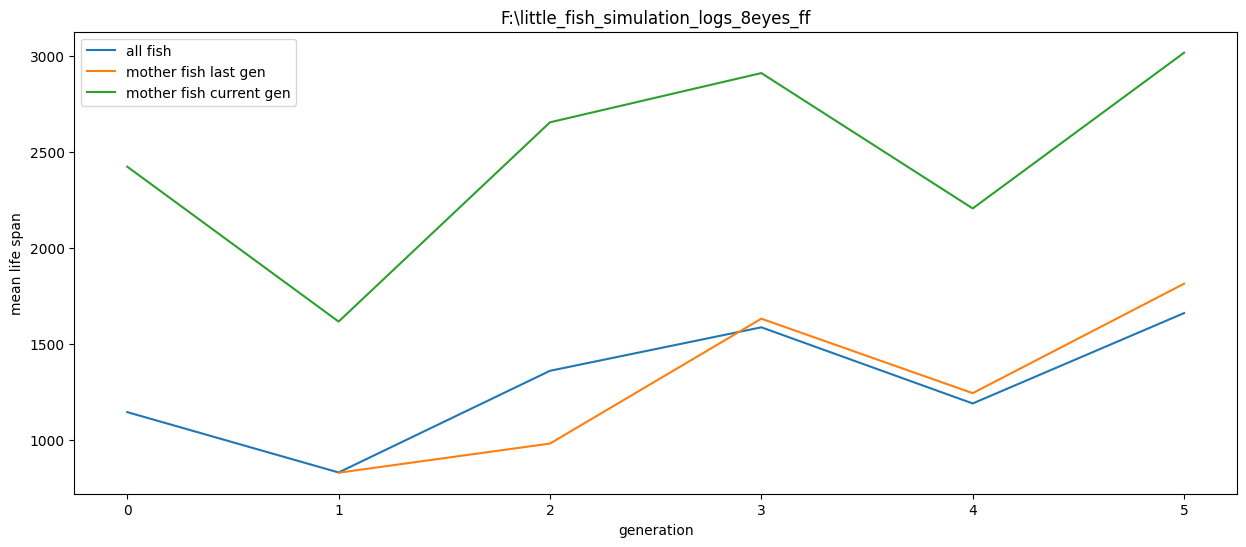

In [22]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()

(0.0, 10000.0)

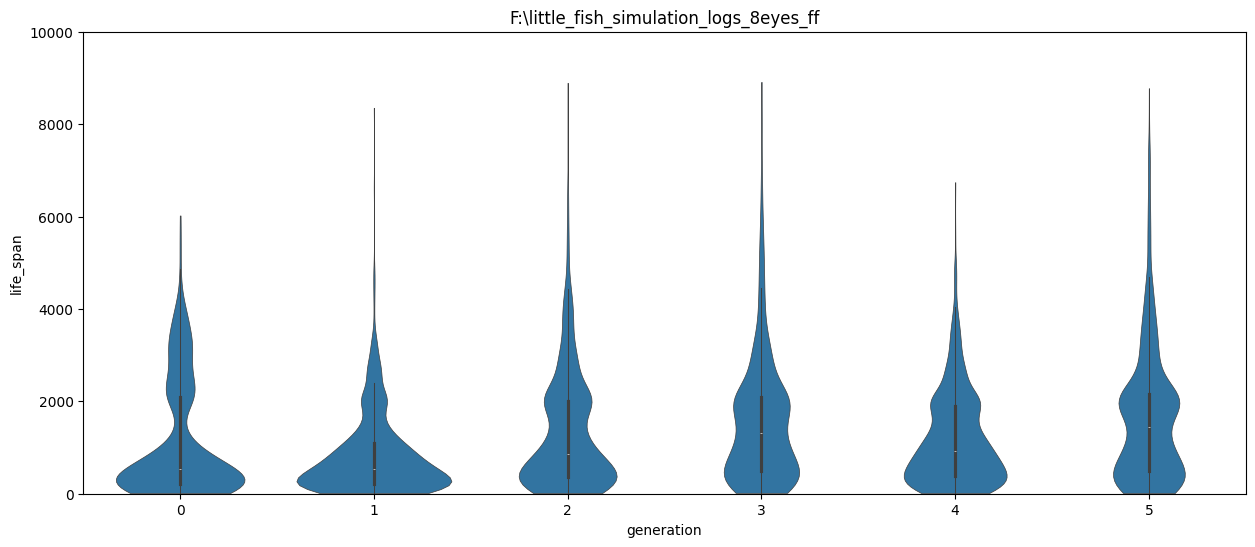

In [23]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=life_span_df, x="generation", y="life_span", ax=ax, cut=0, linewidth=0.5,
)
ax.set_ylim([0, 10000])

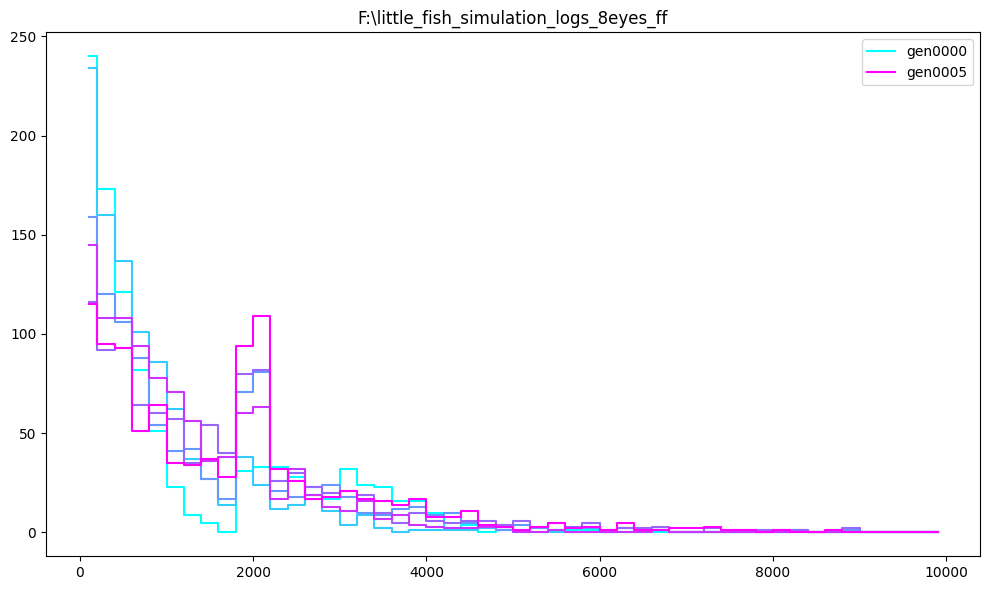

In [24]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title(simulation_folder)
plotting.plot_simulation_life_spans(
    life_span_df, ax, max_life_span=10000, bins=50, legend_gap=5, 
)
ax.legend()
plt.tight_layout()